## Module 4 Worksheet - Chapters 7 & 8

The three checkpoints included in this worksheet need to be completed and marked during your lab session.

### Checkpoint 1 - Imputing Missing Values

Your first task is to repeat the Genome Prediction task from the previous worksheet, but rather than dropping any instances with missing values, we will instead impute any missing values. The updated set of instructions for this task are provided below:

1) Use appropriate reader function from pandas to read the "GenomicData.csv" file provided on FLO. The dataset should have 172 rows and 21053 columns.
2) Drop the first two columns as they have redundant information.
3) Call the function <code>np.random.seed(42)</code>. This has a type of global effect on any function that uses NumPy and makes your results reproducible across multiple runs.
4) ~~Drop any instances that contain a missing (NaN) value. How many instances does this reduce our dataset down to?~~
5) Use the ClassType column as the label (y), and the rest as features (X).
6) Split the data into test and train sets, with a 0.25 test size.
7) **Impute the missing data in both training and test using SimpleImputer transformer (set the strategy to median) from sklearn.impute module (note that for test data imputation, you need to use the extracted information from training data).**
8) Standardize the features.
9) Train two logistic regression models with l1 penalty (use ‘liblinear’ solver) and C = 0:05 and C = 10. What are their accuracies on test data?
10) How many features are “selected” (i.e., have non-zero coefficients) in logistic regression with l1 for C = 0:05 and for C = 10? Hint, you can get the coefficient values for a trained LogisticRefression model by calling the <code>.coef_</code> attribute.

In [1]:
# Enter your code for Checkpoint 1 here

from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import  StandardScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd


df = pd.read_csv('GenomicData.csv')

print(df.shape) 
print(df.head())

(172, 21053)
   Unnamed: 0.1  Unnamed: 0       DDR1      RFC2     HSPA6      PAX8  \
0             0  GSM1019138  11.696575  9.498098  6.926517  8.119192   
1             1  GSM1019139  10.324599  8.463703  7.473955  7.874865   
2             2  GSM1019140  11.416296  7.519654  6.387836  7.983135   
3             3  GSM1019141  10.621342  8.555675  8.714281  7.824748   
4             4  GSM1019142  10.227293  8.057257  8.236758  8.188167   

     GUCA1A      UBA7      THRA    PTPN21  ...  LOC100505794 /// LOC100509111  \
0  3.412547  7.605915  5.287406  5.144362  ...                       4.265834   
1  3.328430  8.129946  5.352852  5.608019  ...                       4.213007   
2  3.646711  8.583098  5.611202  5.319620  ...                       3.806343   
3  4.590441  7.437547  4.943707  5.927861  ...                       4.538299   
4  4.062502  8.115143  5.536319  5.310099  ...                       4.568268   

   LOC100505562  LOC388210     GALR3    NUS1P3     ITIH4  C1orf175 

In [2]:
#  Drop 2 columns 
df = df.drop(df.columns[:2], axis=1)
print(df.shape) 
print(df.head())

(172, 21051)
        DDR1      RFC2     HSPA6      PAX8    GUCA1A      UBA7      THRA  \
0  11.696575  9.498098  6.926517  8.119192  3.412547  7.605915  5.287406   
1  10.324599  8.463703  7.473955  7.874865  3.328430  8.129946  5.352852   
2  11.416296  7.519654  6.387836  7.983135  3.646711  8.583098  5.611202   
3  10.621342  8.555675  8.714281  7.824748  4.590441  7.437547  4.943707   
4  10.227293  8.057257  8.236758  8.188167  4.062502  8.115143  5.536319   

     PTPN21       CCL5    CYP2E1  ...  LOC100505794 /// LOC100509111  \
0  5.144362   8.563300  4.454118  ...                       4.265834   
1  5.608019   8.014143  4.797404  ...                       4.213007   
2  5.319620   8.858539  4.705669  ...                       3.806343   
3  5.927861   9.663748  4.409423  ...                       4.538299   
4  5.310099  10.588755  4.421362  ...                       4.568268   

   LOC100505562  LOC388210     GALR3    NUS1P3     ITIH4  C1orf175 /// TTC4  \
0      4.959345   

In [3]:
# Setting a default to get the same output everytime, it is similar to random_state = 42
np.random.seed(42)

In [4]:
# Setting up label or target

y = df["ClassType"]
X = df.drop(columns=["ClassType"])

y

0      3
1      1
2      1
3      3
4      3
      ..
167    1
168    3
169    1
170    3
171    1
Name: ClassType, Length: 172, dtype: int64

In [5]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=100, test_size= 0.25)



In [6]:
# Impute missing values by SimpleImputer transformer 
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')

# Fit the imputer on the training data, then transform it.
# The 'fit' step calculates the median for each column in X_train.
# The 'transform' step replaces the NaN values in X_train with the calculated medians.
# This is a crucial step to prevent data leakage from the test set.
X_train_imputed = imp.fit_transform(X_train)

# Use the same imputer (with the medians learned from the training data)
# to transform the test data.
# It is important to only use the 'transform' method here. We do not 'fit' on the test data
# to ensure the model is evaluated on unseen data, maintaining data integrity.
X_test_imputed = imp.transform(X_test)


# Convert the imputed NumPy arrays back to pandas DataFrames.
# This makes the data more readable, as it restores the original column names and index.
#X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns, index=X_train.index)
#X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns, index=X_test.index)

# Convert the calculated medians (stored in imp.statistics_) to a pandas Series
# with the original column names as the index for easy readability and inspection.
medians = pd.Series(imp.statistics_, index=X_train.columns)
print("Calculated medians from training data:")
print(medians)


# Print the shape of the imputed training data.
# The shape should be the same as the original X_train, confirming that the
# imputation process did not change the number of rows or columns.
print("\nShape of imputed training data:")
print(X_train_imputed.shape)


Calculated medians from training data:
DDR1                       10.980652
RFC2                        8.676749
HSPA6                       7.360330
PAX8                        8.160439
GUCA1A                      3.713467
                             ...    
NUS1P3                      5.425069
ITIH4                       5.477356
C1orf175 /// TTC4           8.633558
LOC100294402 /// SIGIRR     8.622064
FAM86B1                     6.665649
Length: 21050, dtype: float64

Shape of imputed training data:
(129, 21050)


In [7]:
# Train two logistic regression models C=0.05

results = {}
C = 0.05
logr = LogisticRegression(penalty = 'l1', C = C, solver= 'liblinear') # liblinear suites for small datasets.
logr.fit(X_train_imputed, y_train)
print(logr.score(X_test_imputed, y_test))
acc = logr.score(X_test_imputed, y_test)

n_selected = np.sum(logr.coef_ != 0)
results[C] = {'acc': acc, 'n_selected': n_selected}

print(n_selected)
print(f'C={C}: Test accuracy={acc:.4f}, Non-zero features={n_selected}')

0.9534883720930233
20
C=0.05: Test accuracy=0.9535, Non-zero features=20


In [8]:
# C=10
results = {}
C = 10
logr = LogisticRegression(penalty = 'l1', C = C, solver= 'liblinear')
logr.fit(X_train_imputed, y_train)
print(logr.score(X_test_imputed, y_test))
acc = logr.score(X_test_imputed, y_test)

n_selected = np.sum(logr.coef_ != 0)
results[C] = {'acc': acc, 'n_selected': n_selected}

print(n_selected)
print(f'C={C}: Test accuracy={acc:.4f}, Non-zero features={n_selected}')

0.9767441860465116
1458
C=10: Test accuracy=0.9767, Non-zero features=1458


### Checkpoint 2 - Decision Tree Interpretation

Load the Iris classification dataset.

Write a program to train four DecisionTreeClassifier models to compare the hyperparameter values (max_depth = {1, 2, 3, 4}). 

Which tree depth provides the highest accuracy?

Visualise the structure of decision tree (<code>model</code>) with the highest accuracy using the following code:

```python 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5), dpi=200)
plot_tree(model, feature_names = iris.feature_names, class_names=iris.target_names, filled=True)
```

Use your trained decision tree model to predict the species of the following flower:
- Sepal length (cm) = 5.2
- Sepal width (cm) = 2.6
- Petal length (cm) = 3.9
- Petal width (cm) = 1.4

Verify this prediction manually using your decision tree visualisation.

In [9]:
# Enter your code for Checkpoint 2 here

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state= 100, stratify= iris.target)

# no need to scale value because the decision tree can work with unscale value

In [10]:
# Train Decision Tree models with different maximum depths 
# and record their performance on the test set.

results = {}   # dictionary to store depth : accuracy
models = {}    # dictionary to store depth : trained model

# Try different values of max_depth (1 through 4)
for depth in [1, 2, 3, 4]:
    # Create a Decision Tree with the given depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train (fit) the model on the training data
    model.fit(X_train, y_train)
    
    # Evaluate accuracy of the model on the test data
    acc = model.score(X_test, y_test)
    
    # Save the results for later comparison
    results[depth] = acc      # store accuracy
    models[depth] = model     # store the trained model
    
    # Print the accuracy for this depth
    print(f"Depth={depth}: Test accuracy = {acc:.4f}")


Depth=1: Test accuracy = 0.6667
Depth=2: Test accuracy = 0.9000
Depth=3: Test accuracy = 0.9000
Depth=4: Test accuracy = 0.8667


In [11]:
# Find the depth that gave the highest accuracy
# max(results, key=results.get) returns the depth with the best score
best_depth = max(results, key=results.get)
print(f"Best depth: {best_depth}, Accuracy: {results[best_depth]:.4f}")

# Re-train a Decision Tree using the best depth
# This ensures we have a fresh model trained with the chosen parameter
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)


Best depth: 2, Accuracy: 0.9000


DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.05\nsamples = 39\nvalue = [0, 38, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.093\nsamples = 41\nvalue = [0, 2, 39]\nclass = virginica')]

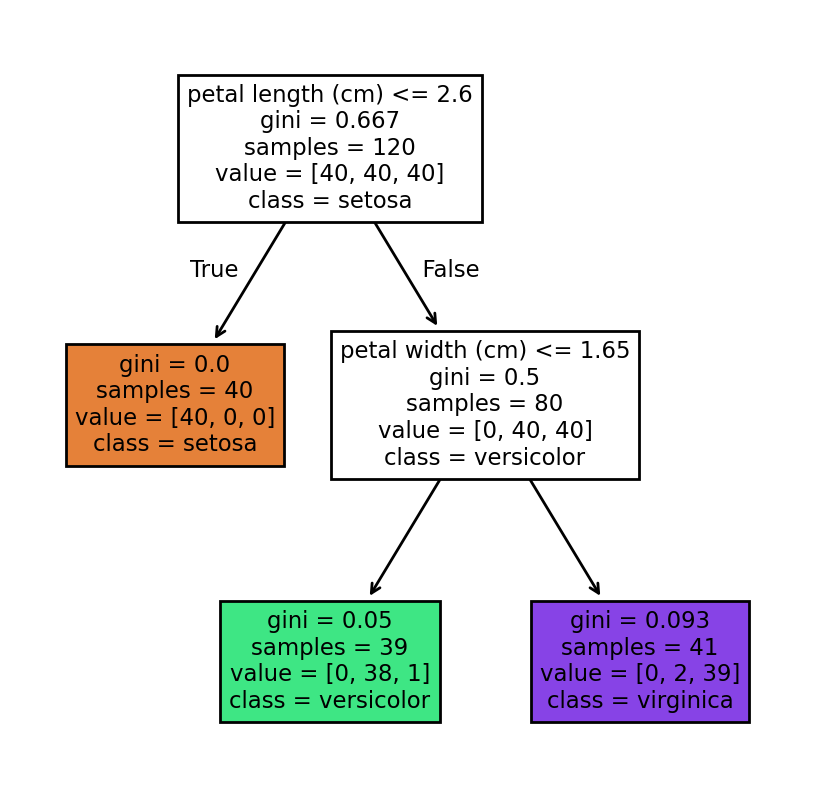

In [12]:
# Create a new figure for the decision tree visualization
# figsize sets the plot size (in inches), dpi sets the resolution (dots per inch)
plt.figure(figsize=(5,5), dpi=200)

# Plot the trained decision tree
# - best_model: the trained DecisionTreeClassifier
# - feature_names: names of input features (from the iris dataset)
# - class_names: names of target classes (iris species)
# - filled=True: color nodes according to class for easier interpretation
plot_tree(best_model, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True)


In [13]:
sample = np.array([[5.2, 2.6, 3.9, 1.4]])
prediction = best_model.predict(sample)
print("Predicted species:", iris.target_names[prediction][0])


Predicted species: versicolor


### Checkpoint 3 - Ensemble Learning Comparison

Load the Iris classification dataset and select just the first two features (i.e., columns with indices 0, 1):

```python 
iris = datasets.load_iris()
X = iris.data[:,[0,1]]
y = iris.target
```

Write a program to train bagging, pasting, random forests and boosting models, using CART (Decision Tree) with four possible hyperparameter values (min_samples_leaf = {2, 5, 10, 20}).

Calculate the accuracy of each model for each hyperparameter value on the test data.

Using the obtained accuracies, answer the following questions:

1) For bagging, the highest accuracy is obtained by ______ trees (choose: Shallow or Deep)
2) For pasting, the highest accuracy is obtained by ______ trees (choose: Shallow or Deep)
3) For random forest, the highest accuracy is obtained by ______ trees (choose: Shallow or Deep)
4) For AdaBoost, the highest accuracy is obtained by ______ trees (choose: Shallow or Deep)

Hint, think about whether a higher or lower min_samples_leaf value will lead to a shallower or deeper decision tree.

In [14]:
# Enter your code for Checkpoint 3 here

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR

from sklearn.ensemble import BaggingClassifier as BAG
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADB
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:,[0,1]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100, stratify= iris.target)

# Define different values for the hyperparameter "min_samples_leaf"
# min_samples_leaf = the minimum number of samples required to be at a leaf node
# Larger values -> tree is more constrained (less deep, less overfitting)
# Smaller values -> tree can grow deeper (more flexible, but risk of overfitting)

min_samples_leaf_values = [2, 5, 10, 20]


In [15]:
# Dictionary to store results for different ensemble methods
# Each method (Bagging, Pasting, RandomForest, AdaBoost) will hold accuracy scores for different min_samples_leaf values
results = {"Bagging": {}, "Pasting": {}, "RandomForest": {}, "AdaBoost": {}}

# Loop over different values of min_samples_leaf (controls how deep or shallow a Decision Tree can grow)
for leaf in min_samples_leaf_values:
    # ------------------------------
    # Base Decision Tree (weak learner)
    # criterion = 'gini' → using Gini impurity for splits
    base_tree = DTC(min_samples_leaf=leaf, criterion='gini')
    
    # ------------------------------
    # Bagging Classifier (bootstrap = True)
    # Uses random sampling WITH replacement to build trees
    bag = BAG(estimator=base_tree, n_estimators=100, bootstrap=True, random_state=42)
    bag.fit(X_train, y_train)
    results["Bagging"][leaf] = accuracy_score(y_test, bag.predict(X_test))
    
    # ------------------------------
    # Pasting Classifier (bootstrap = False)
    # Uses random sampling WITHOUT replacement to build trees
    paste = BAG(estimator=base_tree, n_estimators=100, bootstrap=False, random_state=42)
    paste.fit(X_train, y_train)
    results["Pasting"][leaf] = accuracy_score(y_test, paste.predict(X_test))
    
    # ------------------------------
    # Random Forest Classifier
    # Builds many trees on random subsets of features and samples
    rf = RF(n_estimators=100, min_samples_leaf=leaf, random_state=42)
    rf.fit(X_train, y_train)
    results["RandomForest"][leaf] = accuracy_score(y_test, rf.predict(X_test))
    
    # ------------------------------
    # AdaBoost Classifier
    # Trains weak learners sequentially, each focusing on correcting errors of the previous one
    adb = ADB(estimator=base_tree, n_estimators=100, random_state=42)
    adb.fit(X_train, y_train)
    results["AdaBoost"][leaf] = accuracy_score(y_test, adb.predict(X_test))


In [16]:
# Print out the stored results for each ensemble method
for model in results:
    # Print the ensemble method name (e.g., Bagging, Pasting, etc.)
    print(f"\n{model} Results:")
    
    # Loop over each min_samples_leaf value and its corresponding accuracy
    for leaf, acc in results[model].items():
        # Display the parameter setting and the accuracy score
        print(f"min_samples_leaf={leaf} -> accuracy={acc:.3f}")



Bagging Results:
min_samples_leaf=2 -> accuracy=0.733
min_samples_leaf=5 -> accuracy=0.633
min_samples_leaf=10 -> accuracy=0.633
min_samples_leaf=20 -> accuracy=0.633

Pasting Results:
min_samples_leaf=2 -> accuracy=0.667
min_samples_leaf=5 -> accuracy=0.667
min_samples_leaf=10 -> accuracy=0.567
min_samples_leaf=20 -> accuracy=0.633

RandomForest Results:
min_samples_leaf=2 -> accuracy=0.800
min_samples_leaf=5 -> accuracy=0.800
min_samples_leaf=10 -> accuracy=0.700
min_samples_leaf=20 -> accuracy=0.700

AdaBoost Results:
min_samples_leaf=2 -> accuracy=0.733
min_samples_leaf=5 -> accuracy=0.667
min_samples_leaf=10 -> accuracy=0.733
min_samples_leaf=20 -> accuracy=0.700


In [17]:
# Train ensemble models with different min_samples_leaf values
# n_estimators = number of weak learners (here set to 50)

for leaf in min_samples_leaf_values:  
    # min_samples_leaf controls how deep or shallow the Decision Tree can grow
    
    # ------------------------------
    # Base Decision Tree (weak learner)
    base_tree = DTC(min_samples_leaf=leaf, criterion='gini')
    
    # ------------------------------
    # Bagging (Bootstrap Aggregation)
    # bootstrap=True → sampling with replacement
    bag = BAG(estimator=base_tree, n_estimators=50, bootstrap=True, random_state=42)
    bag.fit(X_train, y_train)
    results["Bagging"][leaf] = accuracy_score(y_test, bag.predict(X_test))
    
    # ------------------------------
    # Pasting
    # bootstrap=False → sampling without replacement
    paste = BAG(estimator=base_tree, n_estimators=50, bootstrap=False, random_state=42)
    paste.fit(X_train, y_train)
    results["Pasting"][leaf] = accuracy_score(y_test, paste.predict(X_test))
    
    # ------------------------------
    # Random Forest
    # An ensemble of decision trees with feature + sample randomness
    rf = RF(n_estimators=50, min_samples_leaf=leaf, random_state=42)
    rf.fit(X_train, y_train)
    results["RandomForest"][leaf] = accuracy_score(y_test, rf.predict(X_test))
    
    # ------------------------------
    # AdaBoost
    # Sequential ensemble where each weak learner focuses on correcting previous mistakes
    adb = ADB(estimator=base_tree, n_estimators=50, random_state=42)
    adb.fit(X_train, y_train)
    results["AdaBoost"][leaf] = accuracy_score(y_test, adb.predict(X_test))


In [18]:
# Print out the results for each ensemble method
for model in results:
    # Print the ensemble method name (e.g., Bagging, Pasting, RandomForest, AdaBoost)
    print(f"\n{model} Results:")
    
    # Loop over each min_samples_leaf value and its accuracy
    for leaf, acc in results[model].items():
        # Print the parameter value and its corresponding accuracy (3 decimal places)
        print(f"min_samples_leaf={leaf} -> accuracy={acc:.3f}")



Bagging Results:
min_samples_leaf=2 -> accuracy=0.733
min_samples_leaf=5 -> accuracy=0.633
min_samples_leaf=10 -> accuracy=0.633
min_samples_leaf=20 -> accuracy=0.633

Pasting Results:
min_samples_leaf=2 -> accuracy=0.667
min_samples_leaf=5 -> accuracy=0.667
min_samples_leaf=10 -> accuracy=0.567
min_samples_leaf=20 -> accuracy=0.633

RandomForest Results:
min_samples_leaf=2 -> accuracy=0.800
min_samples_leaf=5 -> accuracy=0.800
min_samples_leaf=10 -> accuracy=0.700
min_samples_leaf=20 -> accuracy=0.700

AdaBoost Results:
min_samples_leaf=2 -> accuracy=0.733
min_samples_leaf=5 -> accuracy=0.667
min_samples_leaf=10 -> accuracy=0.733
min_samples_leaf=20 -> accuracy=0.733
